In [90]:
%matplotlib inline
import openmc
import os 
os.environ['OPENMC_CROSS_SECTIONS']='/home/hridoy/Desktop/meh/endfb-viii.0-hdf5/cross_sections.xml'

In [91]:
uo2 = openmc.Material(1, "uo2")
print(uo2)

Material
	ID             =	1
	Name           =	uo2
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       



/home/hridoy/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


In [92]:
mat = openmc.Material()
print(mat)

Material
	ID             =	14
	Name           =	
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       



In [93]:
help(uo2.add_nuclide)

Help on method add_nuclide in module openmc.material:

add_nuclide(nuclide: 'str', percent: 'float', percent_type: 'str' = 'ao') method of openmc.material.Material instance
    Add a nuclide to the material

    Parameters
    ----------
    nuclide : str
        Nuclide to add, e.g., 'Mo95'
    percent : float
        Atom or weight percent
    percent_type : {'ao', 'wo'}
        'ao' for atom percent and 'wo' for weight percent



In [94]:
#Add nuclides to uo2
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)

In [95]:
help(uo2.set_density)

Help on method set_density in module openmc.material:

set_density(units: 'str', density: 'float | None' = None) method of openmc.material.Material instance
    Set the density of the material

    Parameters
    ----------
    units : {'g/cm3', 'g/cc', 'kg/m3', 'atom/b-cm', 'atom/cm3', 'sum', 'macro'}
        Physical units of density.
    density : float, optional
        Value of the density. Must be specified unless units is given as
        'sum'.



In [96]:
uo2.set_density('g/cm3', 10.0)

In [97]:
# Cladding material
zirconium = openmc.Material(name="zirconium")
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

# Cooling material
water = openmc.Material(name="h2o")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)

In [98]:
water.add_s_alpha_beta('c_H_in_H2O')

In [99]:
materials = openmc.Materials([uo2, zirconium, water])

In [100]:
materials = openmc.Materials()
materials.append(uo2)
materials += [zirconium, water]
isinstance(materials, list)

True

In [101]:
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0"/>
    <nuclide ao="0.03" name="U235"/>
    <nuclide ao="0.97" name="U238"/>
    <nuclide ao="2.0" name="O16"/>
  </material>
  <material id="15" name="zirconium">
    <density units="g/cm3" value="6.6"/>
    <nuclide ao="0.5145" name="Zr90"/>
    <nuclide ao="0.1122" name="Zr91"/>
    <nuclide ao="0.1715" name="Zr92"/>
    <nuclide ao="0.1738" name="Zr94"/>
    <nuclide ao="0.028" name="Zr96"/>
  </material>
  <material id="16" name="h2o">
    <density units="g/cm3" value="1.0"/>
    <nuclide ao="2.0" name="H1"/>
    <nuclide ao="1.0" name="O16"/>
    <sab name="c_H_in_H2O"/>
  </material>
</materials>


In [102]:
water.remove_nuclide('O16')
water.add_element('O', 1.0)

materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0"/>
    <nuclide ao="0.03" name="U235"/>
    <nuclide ao="0.97" name="U238"/>
    <nuclide ao="2.0" name="O16"/>
  </material>
  <material id="15" name="zirconium">
    <density units="g/cm3" value="6.6"/>
    <nuclide ao="0.5145" name="Zr90"/>
    <nuclide ao="0.1122" name="Zr91"/>
    <nuclide ao="0.1715" name="Zr92"/>
    <nuclide ao="0.1738" name="Zr94"/>
    <nuclide ao="0.028" name="Zr96"/>
  </material>
  <material id="16" name="h2o">
    <density units="g/cm3" value="1.0"/>
    <nuclide ao="2.0" name="H1"/>
    <nuclide ao="0.9976206" name="O16"/>
    <nuclide ao="0.000379" name="O17"/>
    <nuclide ao="0.0020004" name="O18"/>
    <sab name="c_H_in_H2O"/>
  </material>
</materials>


In [103]:
!cat $OPENMC_CROSS_SECTIONS | head -n 10
print('    ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="neutron/H1.h5" type="neutron" />
  <library materials="H2" path="neutron/H2.h5" type="neutron" />
  <library materials="H3" path="neutron/H3.h5" type="neutron" />
  <library materials="He3" path="neutron/He3.h5" type="neutron" />
  <library materials="He4" path="neutron/He4.h5" type="neutron" />
  <library materials="Li6" path="neutron/Li6.h5" type="neutron" />
  <library materials="Li7" path="neutron/Li7.h5" type="neutron" />
  <library materials="Be7" path="neutron/Be7.h5" type="neutron" />
    ...
  <library materials="U" path="photon/U.h5" type="photon" />
  <library materials="Np" path="photon/Np.h5" type="photon" />
  <library materials="Pu" path="photon/Pu.h5" type="photon" />
  <library materials="Am" path="photon/Am.h5" type="photon" />
  <library materials="Cm" path="photon/Cm.h5" type="photon" />
  <library materials="Bk" path="photon/Bk.h5" type="photon" />
  <library materials="Cf" path

In [104]:
uo2_three = openmc.Material()
uo2_three.add_element('U', 1.0, enrichment=3.0)
uo2_three.add_element('O', 2.0)
uo2_three.set_density('g/cm3', 10.0)

In [105]:
# Creating PuO2 material
puo2 = openmc.Material()
puo2.add_nuclide('Pu239', 0.94)
puo2.add_nuclide('Pu240', 0.06)
puo2.add_nuclide('O16', 2.0)
puo2.set_density('g/cm3', 11.5)

#Create the mixture
mox = openmc.Material.mix_materials([uo2, puo2], [0.97, 0.03], 'wo')

In [106]:
sphere = openmc.Sphere(r=1.0)

In [107]:
inside_sphere = -sphere
outside_sphere = +sphere

In [108]:
print((0,0,0) in inside_sphere, (0,0,2) in inside_sphere)
print((0,0,0) in outside_sphere, (0,0,2) in outside_sphere)

True False
False True


In [109]:
z_plane = openmc.ZPlane(0)
northern_hemisphere = -sphere & +z_plane

In [110]:
northern_hemisphere.bounding_box

BoundingBox(lower_left=(-1.0, -1.0, 0.0), upper_right=(1.0, 1.0, 1.0))

In [111]:
cell = openmc.Cell()
cell.region = northern_hemisphere

#or...
cell = openmc.Cell(region=northern_hemisphere)

In [112]:
cell.fill = water

In [113]:
universe = openmc.Universe()
universe.add_cell(cell)

# this also works 
universe = openmc.Universe(cells=[cell])

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

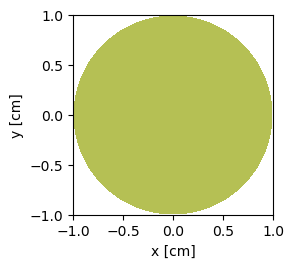

In [114]:
universe.plot(width=(2.0, 2.0), origin=(0.0, 0.0, 0.1))

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

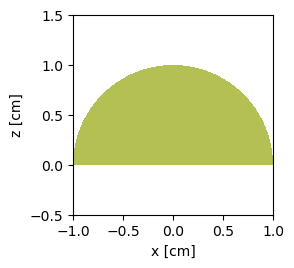

In [115]:
universe.plot(width=(2.0, 2.0), basis='xz')

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

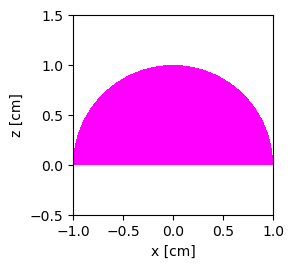

In [116]:
universe.plot(width=(2.0, 2.0), basis='xz',
              colors={cell: 'fuchsia'})

Pin cell geometry

1. The outer surface of the fuel -- a cylinder parallel to the z axis
2. The inner surface of the clad -- same as above
3. The outer surface of the clad -- same as above

In [117]:
fuel_outer_radius = openmc.ZCylinder(r=0.39)
clad_inner_radius = openmc.ZCylinder(r=0.40)
clad_outer_radius = openmc.ZCylinder(r=0.46)

In [118]:
fuel_region = -fuel_outer_radius
gap_region = +fuel_outer_radius & -clad_inner_radius
clad_region = +clad_inner_radius & -clad_outer_radius

In [119]:
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region

gap = openmc.Cell(name='air gap')
gap.region = gap_region

clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region

In [120]:
pitch = 1.26
left = openmc.XPlane(-pitch/2, boundary_type='reflective')
right = openmc.XPlane(pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top = openmc.YPlane(pitch/2, boundary_type='reflective')


In [121]:
water_region = +left & -right & +bottom & -top & +clad_outer_radius

moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region

In [122]:
box = openmc.model.RectangularPrism(width=pitch, height=pitch,
                                    boundary_type='reflective')
type(box)



openmc.model.surface_composite.RectangularPrism

In [123]:
water_region = -box & +clad_outer_radius

In [124]:
root_universe = openmc.Universe(cells=(fuel, gap, clad, moderator))

geometry = openmc.Geometry()
geometry.root_universe = root_universe

# or...
geometry = openmc.Geometry(root_universe)
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell id="15" material="1" name="fuel" region="-36" universe="9"/>
  <cell id="16" material="void" name="air gap" region="36 -37" universe="9"/>
  <cell id="17" material="15" name="clad" region="37 -38" universe="9"/>
  <cell id="18" material="16" name="moderator" region="39 -40 41 -42 38" universe="9"/>
  <surface coeffs="0.0 0.0 0.39" id="36" type="z-cylinder"/>
  <surface coeffs="0.0 0.0 0.4" id="37" type="z-cylinder"/>
  <surface coeffs="0.0 0.0 0.46" id="38" type="z-cylinder"/>
  <surface boundary="reflective" coeffs="-0.63" id="39" type="x-plane"/>
  <surface boundary="reflective" coeffs="0.63" id="40" type="x-plane"/>
  <surface boundary="reflective" coeffs="-0.63" id="41" type="y-plane"/>
  <surface boundary="reflective" coeffs="0.63" id="42" type="y-plane"/>
</geometry>


In [125]:
# Create a point source 
point = openmc.stats.Point((0, 0, 0))
source = openmc.IndependentSource(space=point)

In [126]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [127]:
settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='UTF-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source particle="neutron" strength="1.0" type="independent">
    <space type="point">
      <parameters>0 0 0</parameters>
    </space>
  </source>
</settings>


In [128]:
# filter = where to be tallied & source = what to be tallied
cell_filter = openmc.CellFilter(fuel)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

/home/hridoy/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Tally instance already exists with id=1.
  warn(msg, IDWarning)


In [129]:
tally.nuclides = ['U235']
tally.scores = ['total', 'fission', 'absorption', '(n,gamma)']

In [130]:
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

<?xml version='1.0' encoding='UTF-8'?>
<tallies>
  <filter id="3" type="cell">
    <bins>15</bins>
  </filter>
  <tally id="1">
    <filters>3</filters>
    <nuclides>U235</nuclides>
    <scores>total fission absorption (n,gamma)</scores>
  </tally>
</tallies>


In [131]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [132]:
!cat tallies.out

 ============================>     TALLY 1     <============================

 Cell 15
   U235
     Total Reaction Rate                  0.729668 +/- 0.00250505
     Fission Rate                         0.546507 +/- 0.00205907
     Absorption Rate                      0.657665 +/- 0.00242641
     (n,gamma)                            0.111158 +/- 0.000381612


In [135]:
plot = openmc.Plot()
plot.filename = 'pinplot'
plot.width = (pitch, pitch)
plot.pixels = (200, 200)
plot.color_by = 'material'
plot.colors = {uo2: 'yellow', water: 'blue'}

In [136]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

<?xml version='1.0' encoding='UTF-8'?>
<plots>
  <plot basis="xy" color_by="material" filename="pinplot" id="12" type="slice">
    <pixels>200 200</pixels>
    <origin>0.0 0.0 0.0</origin>
    <width>1.26 1.26</width>
    <color id="1" rgb="255 255 0"/>
    <color id="16" rgb="0 0 255"/>
  </plot>
</plots>


In [137]:
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

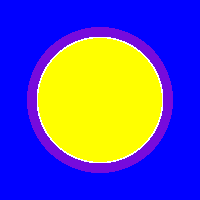

In [138]:
from IPython.display import Image
Image("pinplot.png")

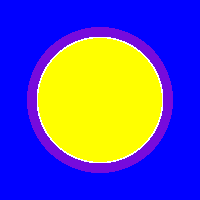

In [139]:
plot.to_ipython_image()